<a href="https://colab.research.google.com/github/JuanCamiloGB/Signals-and-Systems/blob/master/Taller03/2.%20Transformada%20de%20Laplace%20y%20analisis%20de%20SLIT/2.8)_Ejercicio_simular_Circuito_RLC_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**2.8 Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresion de la salida en el tiempo para una configuracion en lazo cerrado del sistema, en funcion de R, L y C, para las siguientes entradas:**
###**i) impulso $[δ(t)]$, ii) escalon unitario $[u(t)]$, y iv) rampa $[t^2]$.**

###Librerias

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sympy import DiracDelta, S
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sym.init_printing()

#CIRCUITO RLC SERIE 


###SEÑAL IMPULSO

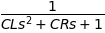

In [3]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1

Y_ext = 1/(L*C*s**2 + R*C*s + 1) * X
#Función de salida para y_externa
Y_ext

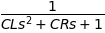

In [4]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y_ext.apart(s)
Yp

In [5]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

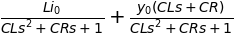

In [6]:
#se define y_int(s)
i0, y0 = sym.symbols('i0 y0', real=True)

Y_int = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Y_int

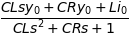

In [7]:
#Función de salida en Laplace factorizada (fracciones parciales)
YR = Y_int.apart(s)
YR

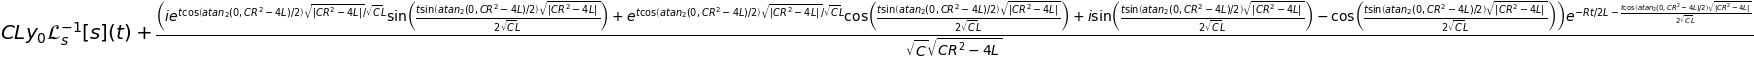

In [8]:
#Modelo en el tiempo en función de RLC
Ye = YR
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt_int = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt_int+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt_int

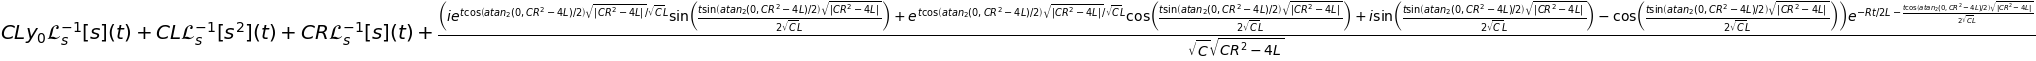

In [9]:
y_t = yt+ yt_int
y_t

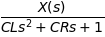

In [10]:
#Modelo en el tiempo con RLC evaluados
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y_ext = 1/(L*C*s**2 + R*C*s + 1) * X
Y_ext

In [11]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

y_ext = sym.inverse_laplace_transform(Y_ext.subs(RLC).subs(X,1), s, t)
y_ext

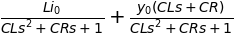

In [12]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [13]:
#se inicializa y_interna con valores iniciales 
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

In [14]:
yt = y_ext + yint
yt.simplify()

En la siguiente gráfica se presentan: 
* la parte interna $y_\text{int}(t)$ (Línea verde), 
* la parte externa $y_\text{ext}(t)$ (Línea azul), 
* la señal de salida $y(t)$ (Línea roja) 

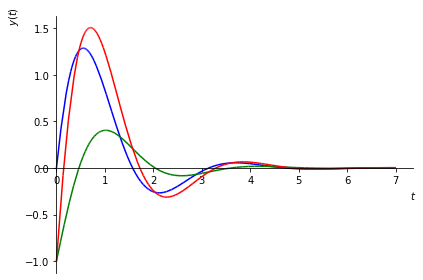

In [15]:
p1 = sym.plot(y_ext, (t, 0, 7), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 7), line_color='g', show=False)
p3 = sym.plot(yt, (t, 0, 7
                   
                   ), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

### ESCALÓN UNITARIO

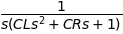

In [16]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s

Y_ext = 1/(L*C*s**2 + R*C*s + 1) * X
#Función de salida para y_externa
Y_ext

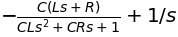

In [17]:
Yp = Y_ext.apart(s)
Yp

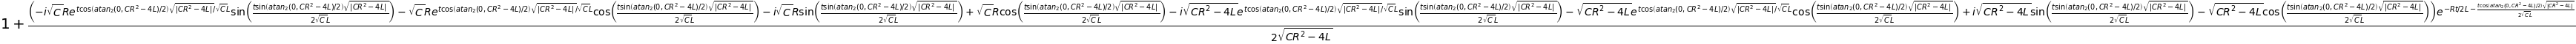

In [18]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

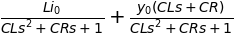

In [19]:
#se define y_int(s)
i0, y0 = sym.symbols('i0 y0', real=True)

Y_int = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Y_int

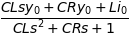

In [20]:
#Función de salida en Laplace factorizada (fracciones parciales)
YR = Y_int.apart(s)
YR

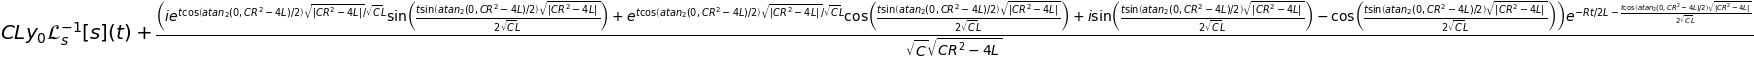

In [21]:
#Modelo en el tiempo en función de RLC
Ye = YR
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt_int = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt_int+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt_int

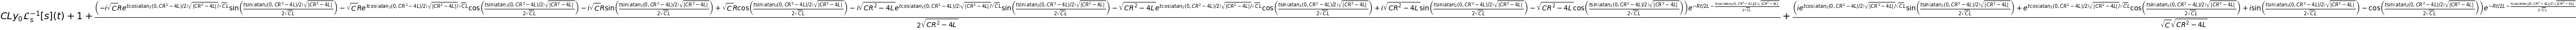

In [22]:
y_t = yt+ yt_int
y_t

In [23]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      y_ext = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      y_ext+= sym.inverse_laplace_transform(Ye.args[j], s, t)
 
y_ext

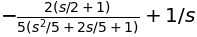

In [24]:
#Función de salida Y(s) -- Laplace
Ye

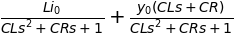

In [25]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [26]:
#se inicializa y_interna con valores iniciales 
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t)
yint

In [27]:
yt = y_ext + yint
yt.simplify()

En la siguiente gráfica se presentan: 
* la parte interna $y_\text{int}(t)$ (Línea verde), 
* la parte externa $y_\text{ext}(t)$ (Línea azul), 
* la señal de salida $y(t)$ (Línea roja) 

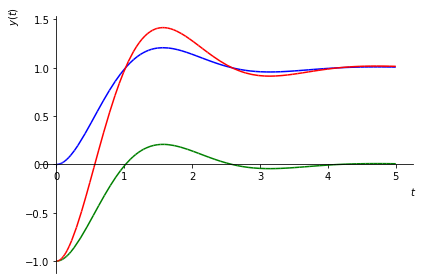

In [28]:
p1 = sym.plot(y_ext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(yt, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

###RAMPA

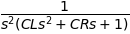

In [29]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s**2

Y_ext = 1/(L*C*s**2 + R*C*s + 1) * X
#Función de salida para y_externa
Y_ext

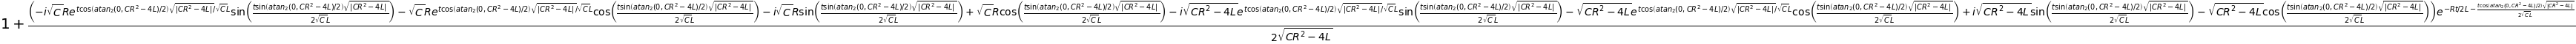

In [30]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

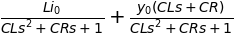

In [31]:
#se define y_int(s)
i0, y0 = sym.symbols('i0 y0', real=True)

Y_int = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Y_int

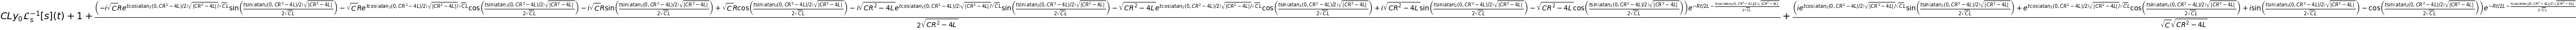

In [32]:
y_t = yt+ yt_int
y_t

In [33]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      y_ext = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      y_ext+= sym.inverse_laplace_transform(Ye.args[j], s, t)
 
y_ext

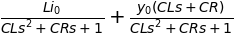

In [34]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [35]:
#se inicializa y_interna con valores iniciales 
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t)
yint

In [36]:
yt = y_ext + yint
yt.simplify()

En la siguiente gráfica se presentan: 
* la parte interna $y_\text{int}(t)$ (Línea verde), 
* la parte externa $y_\text{ext}(t)$ (Línea azul), 
* la señal de salida $y(t)$ (Línea roja) 

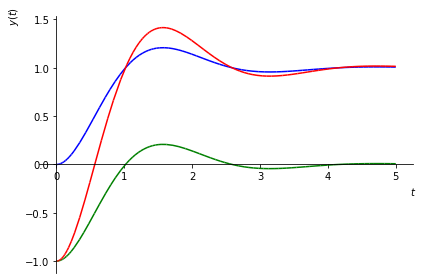

In [37]:
p1 = sym.plot(y_ext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(yt, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

#CIRCUITO RLC PARALELO

###SEÑAL IMPULSO

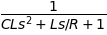

In [38]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1

Y_ext = 1/(L*C*s**2 + (L/R)*s + 1) * X
#Función de salida para y_externa
Y_ext

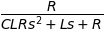

In [39]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y_ext.apart(s)
Yp

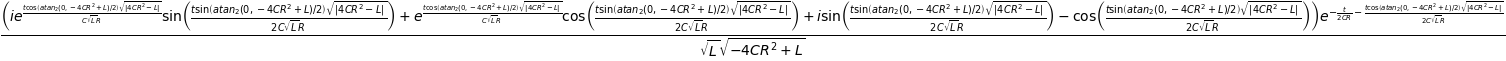

In [40]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

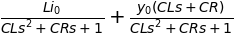

In [41]:
#se define y_int(s)
i0, y0 = sym.symbols('i0 y0', real=True)

Y_int = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Y_int

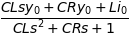

In [42]:
#Función de salida en Laplace factorizada (fracciones parciales)
YR = Y_int.apart(s)
YR

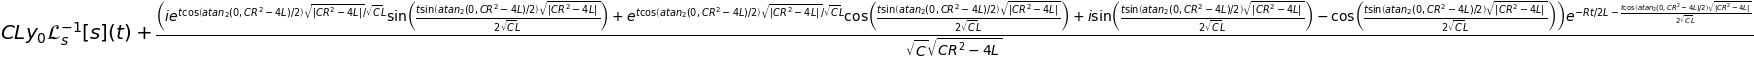

In [43]:
#Modelo en el tiempo en función de RLC
Ye = YR
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt_int = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt_int+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt_int

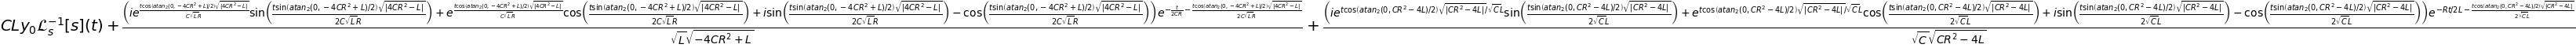

In [44]:
y_t = yt+ yt_int
y_t

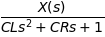

In [45]:
#Modelo en el tiempo con RLC evaluados
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y_ext = 1/(L*C*s**2 + R*C*s + 1) * X
Y_ext

In [46]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

y_ext = sym.inverse_laplace_transform(Y_ext.subs(RLC).subs(X,1), s, t)
y_ext

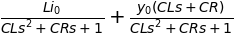

In [47]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [48]:
#se inicializa y_interna con valores iniciales 
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

In [49]:
yt = y_ext + yint
yt.simplify()

En la siguiente gráfica se presentan: 
* la parte interna $y_\text{int}(t)$ (Línea verde), 
* la parte externa $y_\text{ext}(t)$ (Línea azul), 
* la señal de salida $y(t)$ (Línea roja) 

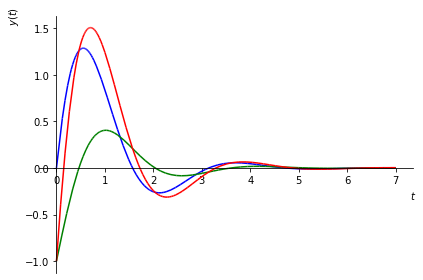

In [50]:
p1 = sym.plot(y_ext, (t, 0, 7), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 7), line_color='g', show=False)
p3 = sym.plot(yt, (t, 0, 7
                   
                   ), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

###SEÑAL ESCALÓN

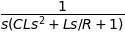

In [51]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s

Y_ext = 1/(L*C*s**2 + (L/R)*s + 1) * X
#Función de salida para y_externa
Y_ext

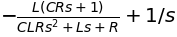

In [52]:
Yp = Y_ext.apart(s)
Yp

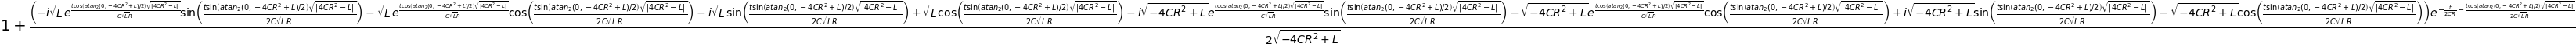

In [53]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

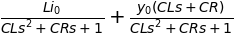

In [54]:
#se define y_int(s)
i0, y0 = sym.symbols('i0 y0', real=True)

Y_int = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Y_int

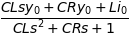

In [55]:
YR = Y_int.apart(s)
YR

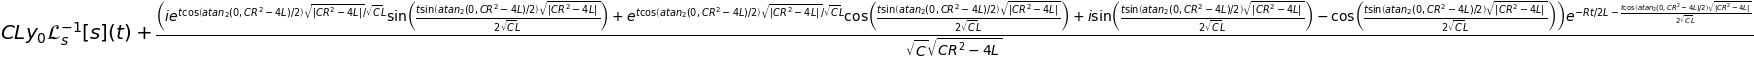

In [56]:
#Modelo en el tiempo en función de RLC
Ye = YR
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt_int = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt_int+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt_int

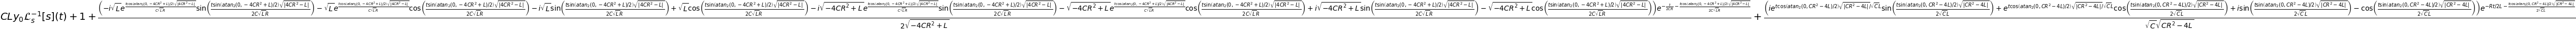

In [57]:
y_t = yt+ yt_int
y_t

In [58]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      y_ext = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      y_ext+= sym.inverse_laplace_transform(Ye.args[j], s, t)
 
y_ext

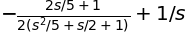

In [59]:
#Función de salida Y(s) -- Laplace
Ye

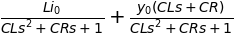

In [60]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [61]:
#se inicializa y_interna con valores iniciales 
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t)
yint

In [62]:
yt = y_ext + yint
yt.simplify()

En la siguiente gráfica se presentan: 
* la parte interna $y_\text{int}(t)$ (Línea verde), 
* la parte externa $y_\text{ext}(t)$ (Línea azul), 
* la señal de salida $y(t)$ (Línea roja) 

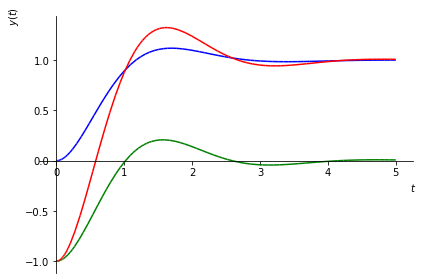

In [63]:
p1 = sym.plot(y_ext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(yt, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

### RAMPA

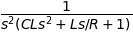

In [64]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s**2

Y_ext = 1/(L*C*s**2 + (L/R)*s + 1) * X
#Función de salida para y_externa
Y_ext

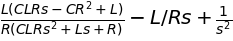

In [65]:
Yp = Y_ext.apart(s)
Yp

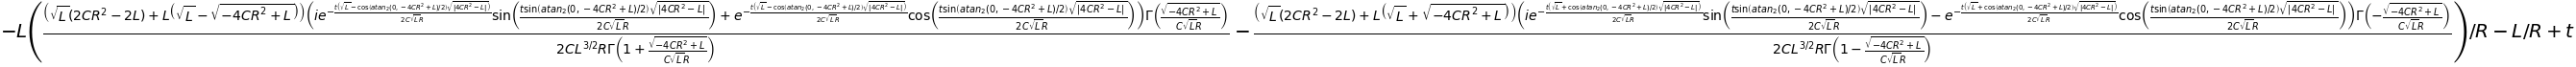

In [66]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

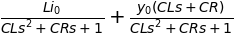

In [67]:
#se define y_int(s)
i0, y0 = sym.symbols('i0 y0', real=True)

Y_int = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Y_int

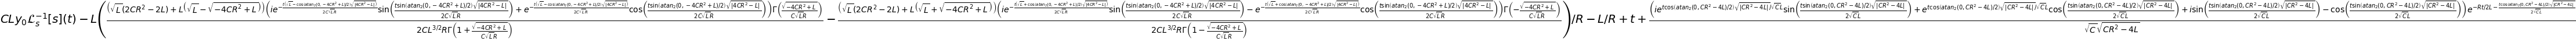

In [68]:
y_t = yt+ yt_int
y_t

In [69]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      y_ext = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      y_ext+= sym.inverse_laplace_transform(Ye.args[j], s, t)
 
y_ext

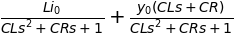

In [70]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [71]:
#se inicializa y_interna con valores iniciales 
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t)
yint

In [72]:
yt = y_ext + yint
yt.simplify()

En la siguiente gráfica se presentan: 
* la parte interna $y_\text{int}(t)$ (Línea verde), 
* la parte externa $y_\text{ext}(t)$ (Línea azul), 
* la señal de salida $y(t)$ (Línea roja) 

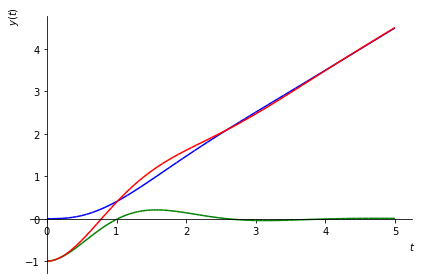

In [73]:
p1 = sym.plot(y_ext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(yt, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()